In [3]:
import pandas as pd

In [4]:

# orders_clean.csv
url = "https://drive.google.com/file/d/1E48qNn8qL19svcoxxuexON3w9u7K9VWA/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_clean = pd.read_csv(path)

# orderlines_clean.csv
url = "https://drive.google.com/file/d/1-1EkcKxa2ZnxnkY0cXagsDL2cwKDcAn5/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_clean = pd.read_csv(path)

# products_clean.csv
url = "https://drive.google.com/file/d/1-3B0Uz-G5piq9yR1Hoky_KkYuSjJ7btK/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_clean = pd.read_csv(path)

# brands_clean.csv
url = "https://drive.google.com/file/d/1-EWdb9jcMw6W9qurRvmGvHQJHSMFw6O0/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands_clean= pd.read_csv(path)

In [5]:

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [6]:
orders_clean.shape#226.904 rows

(226904, 4)

In [7]:
orderlines_clean.shape#293.981 rows

(293981, 6)

In [8]:
import numpy as np
orderlines_clean['check_order'] = np.where(orderlines_clean["sku"].isin(products_clean['sku']), True,False)#add a new column:false if  we have an unkowen product 

In [9]:
df=orderlines_clean[orderlines_clean["check_order"]==False]["order_id"].unique()#take all the orders id where there is an unknown products and drop the whole order

In [10]:
len(df)

5800

In [11]:
orderlines_clean= orderlines_clean.loc[~orderlines_clean['order_id'].isin(df),:]

In [12]:
orderlines_clean= orderlines_clean.loc[orderlines_clean['order_id'].isin(orders_clean['order_id']),:]

In [13]:
orders_clean = orders_clean.loc[orders_clean['order_id'].isin(orderlines_clean['order_id']),:]#clean the orders

In [14]:
orders_clean.shape

(198894, 4)

In [15]:
orderlines_clean.shape

(282708, 7)

In [16]:
o_ol = orders_clean[orders_clean["status"]=="Completed"].merge(orderlines_clean
    ,
    how = 'inner',
    on = 'order_id'
)
o_ol

,order_id,created_date,total_paid,status,id,product_quantity,sku,unit_price,date,check_order
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,1,LAC0212,129.16,2017-11-06 12:47:20,True
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,1,PAR0074,10.77,2017-12-31 17:26:40,True
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,1,OWC0074,77.99,2017-02-15 17:07:44,True
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,1,TAD0007,149.00,2017-06-28 11:12:30,True
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,2,PAC1561,52.99,2017-01-21 12:49:00,True
...,...,...,...,...,...,...,...,...,...,...
59969,527042,2018-03-14 11:47:50,18.98,Completed,1649446,1,APP0927,13.99,2018-03-14 11:42:38,True
59970,527070,2018-03-14 11:50:48,24.97,Completed,1649512,2,APP0698,9.99,2018-03-14 11:49:01,True
59971,527074,2018-03-14 11:51:42,24.97,Completed,1649522,2,APP0698,9.99,2018-03-14 11:49:36,True
59972,527096,2018-03-14 11:58:40,34.96,Completed,1649565,3,APP0698,9.99,2018-03-14 11:54:35,True


In [17]:
o_ol['total_unit_price'] = o_ol['unit_price']*o_ol['product_quantity']
o_ol.sample(2)

,order_id,created_date,total_paid,status,id,product_quantity,sku,unit_price,date,check_order,total_unit_price
14725,362513,2017-06-05 18:30:41,71.98,Completed,1261949,1,FCM0026,66.99,2017-06-05 18:28:57,True,66.99
45186,470885,2017-12-24 19:06:58,168.43,Completed,1513767,1,PRY0009,18.95,2017-12-24 19:03:08,True,18.95


In [18]:
grouped = o_ol.groupby(['order_id','total_paid']).agg({'total_unit_price':'sum'})
grouped

,,total_unit_price
order_id,total_paid,
241423,136.15,129.16
242832,15.76,10.77
243330,84.98,77.99
245275,149.00,149.00
245595,112.97,105.98
...,...,...
527042,18.98,13.99
527070,24.97,19.98
527074,24.97,19.98


In [19]:
grouped = grouped.reset_index()

In [20]:
grouped['extra_costs'] = grouped['total_paid'] - grouped['total_unit_price']
grouped.sample(10)

,order_id,total_paid,total_unit_price,extra_costs
15537,384162,169.00,169.00,0.00
21126,411247,164.98,160.99,3.99
44036,519795,28.98,24.99,3.99
37524,487405,1391.58,1384.59,6.99
14723,380462,85.99,79.00,6.99
44248,520577,379.98,372.99,6.99
2260,308248,83.98,79.99,3.99
43005,514900,106.73,99.74,6.99
1131,303663,44.97,39.98,4.99
16853,389971,120.07,120.07,0.00


In [21]:
grouped["total_unit_price"].sum()

14858348.68

In [ ]:
grouped["extra_costs"].mean()

4.2675155964111715

In [ ]:
grouped[grouped['extra_costs']>20]["order_id"].count()#56 rows

56

In [ ]:
df2=grouped[grouped['extra_costs']>20]["order_id"].unique()

In [ ]:
orderlines_clean=orderlines_clean.loc[~orderlines_clean['order_id'].isin(df2),:]

In [ ]:
grouped[grouped['extra_costs']<-0.01]["order_id"].count()#387 rows

387

In [ ]:
df3=grouped[grouped['extra_costs']<-0.01]["order_id"].unique()

In [ ]:
orderlines_clean= orderlines_clean.loc[~orderlines_clean['order_id'].isin(df3),:]

In [ ]:
orders_clean = orders_clean.loc[orders_clean['order_id'].isin(orderlines_clean['order_id']),:]

In [ ]:
orderlines_clean.shape

(282038, 7)

In [ ]:
orders_clean.shape

(198451, 4)

## What is the time period that the dataset covers?

In [ ]:
orderlines_clean["date"].min()

'2017-01-01 00:07:19'

In [ ]:
orderlines_clean["date"].max()

'2018-03-14 13:58:36'

In [ ]:
#the data that we have is from 1/1/2017 until 14/03/2018

## What is the overall revenue for that time?

In [ ]:
orders_clean["total_paid"].sum()

122426550.75999998

In [ ]:
#the company revenue in this period is 122,426,550euro

In [ ]:
orderlines_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282038 entries, 0 to 293980
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                282038 non-null  int64  
 1   order_id          282038 non-null  int64  
 2   product_quantity  282038 non-null  int64  
 3   sku               282038 non-null  object 
 4   unit_price        282038 non-null  float64
 5   date              282038 non-null  object 
 6   check_order       282038 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 15.3+ MB


##Are there seasonal patterns in the evolution of sales?

In [ ]:
orderlines_clean["date"] = pd.to_datetime(orderlines_clean["date"])

In [ ]:
orderlines_clean["month_name"] = orderlines_clean["date"].dt.month_name()

<Axes: xlabel='month_name'>

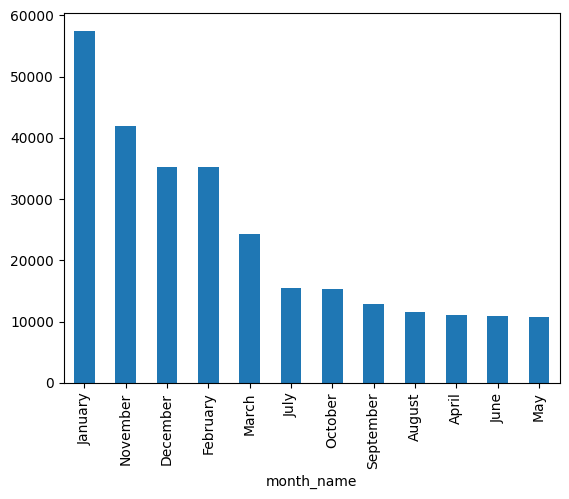

In [ ]:
orderlines_clean.groupby("month_name")["order_id"].count().sort_values(ascending=False).plot.bar()

In [ ]:
#we can see that the best saison sale is between november and february (black friday and chrismas)

In [ ]:
products_clean

,sku,name,desc,type,short,price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,8696,RAI,59.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,13855401,APP,60.49
2,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,13855401,APP,60.49
3,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,13855401,APP,60.49
4,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,1387,APP,59.00
...,...,...,...,...,...,...
21101,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,12282,BEL,29.99
21102,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,1392,THU,69.95
21103,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,1392,THU,69.95
21104,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,1392,THU,69.95


##What are the most sold products?

<Axes: xlabel='name'>

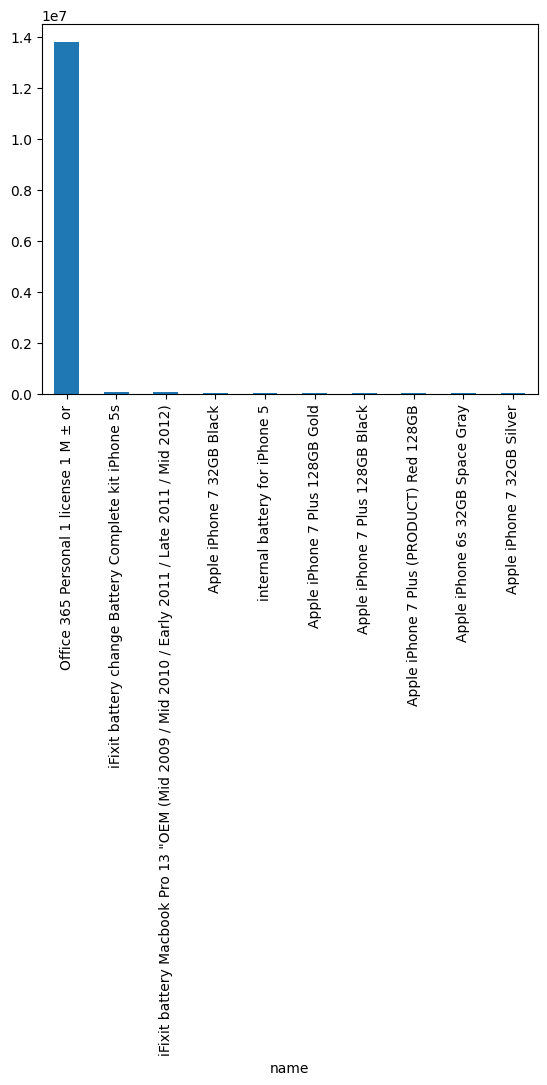

In [ ]:
orderlines_clean.merge(products_clean,how="inner",on="sku").groupby("name")["product_quantity"].sum().nlargest(10).plot.bar()

## What are the products that generate the most revenue?

<Axes: xlabel='name'>

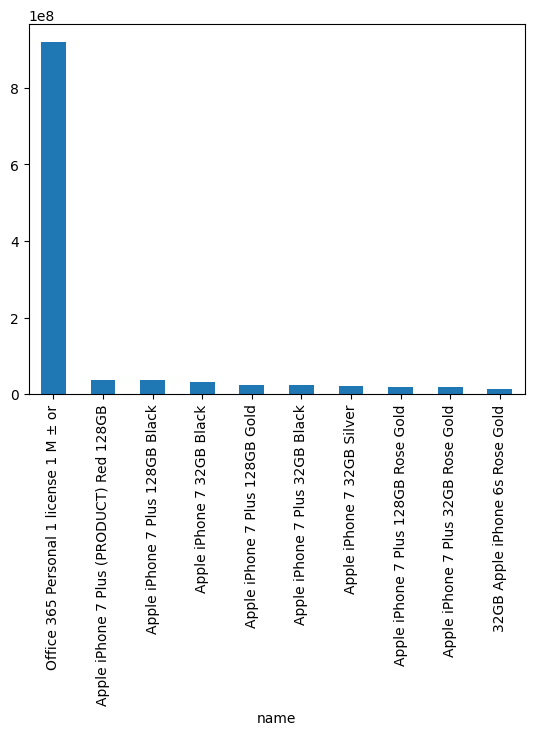

In [ ]:
products_clean.merge(orderlines_clean,how="inner",on="sku").groupby("name")["unit_price"].sum().nlargest(10).plot.bar()

In [ ]:
products_clean["price"].max()

15349.0

In [ ]:
orderlines_clean["unit_price"].max()

15349.0

In [ ]:
ol_pr=orderlines_clean.merge(products_clean,how="inner",on="sku")

In [ ]:
ol_pr["discouts"]=ol_pr["price"]-ol_pr["unit_price"]

In [ ]:
ol_pr

,id,order_id,product_quantity,sku,unit_price,date,check_order,month_name,name,desc,type,short,price,discouts
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,True,January,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,11865403,OTT,34.99,16.00
1,1119236,299603,1,OTT0133,18.99,2017-01-01 10:18:53,True,January,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,11865403,OTT,34.99,16.00
2,1121709,300713,1,OTT0133,19.99,2017-01-02 16:51:26,True,January,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,11865403,OTT,34.99,15.00
3,1123230,301432,1,OTT0133,19.99,2017-01-03 11:21:52,True,January,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,11865403,OTT,34.99,15.00
4,1129502,302307,1,OTT0133,19.99,2017-01-04 10:11:45,True,January,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,11865403,OTT,34.99,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15217440,1649391,527021,1,WAC0255,186.99,2018-03-14 11:36:03,True,March,Wacom Intuos Graphics Tablet M Bluetooth Black,Medium-edge graphics tablet with Bluetooth int...,1405,WAC,199.00,12.01
15217441,1649865,527043,1,WAC0257,186.99,2018-03-14 12:38:59,True,March,Wacom Intuos Graphics Tablet M Bluetooth Pista...,Medium-edge graphics tablet with Bluetooth int...,1405,WAC,199.00,12.01
15217442,1649971,526998,1,HTE0013-A,48.68,2018-03-14 12:57:52,True,March,Open - HyperJuice Battery 80Wh USB-C 4 x QC US...,Reconditioned Adapter 80W charging HyperJuice ...,12585395,HTE,79.95,31.27
15217443,1649972,527278,1,ADN0061,80.99,2018-03-14 12:57:54,True,March,Adonith Stylus Pro Black Pixel,Bluetooth digital pen tip 19mm Pro for iPad,1229,ADN,84.99,4.00


In [ ]:
ol_pr["discouts"].mean()

7.550597417700556

In [ ]:
ol_pr[ol_pr["discouts"]>1000].nlargest(100,"discouts")

,id,order_id,product_quantity,sku,unit_price,date,check_order,month_name,name,desc,type,short,price,discouts
15215206,1574478,496269,1,APP2674,6.59,2018-01-22 18:07:59,True,January,"Apple iMac Pro 27 ""10-core Intel Xeon 3GHz W |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,118692158,APP,7179.00,7172.41
14966737,1614274,511713,2,LAC0223,8208.00,2018-02-14 19:53:29,True,February,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,11935397,LAC,15349.00,7141.00
14966738,1614274,511713,2,LAC0223,8208.00,2018-02-14 19:53:29,True,February,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,11935397,LAC,15349.00,7141.00
14966739,1614274,511713,2,LAC0223,8208.00,2018-02-14 19:53:29,True,February,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,11935397,LAC,15349.00,7141.00
14966740,1614274,511713,2,LAC0223,8208.00,2018-02-14 19:53:29,True,February,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,11935397,LAC,15349.00,7141.00
14966741,1614274,511713,2,LAC0223,8208.00,2018-02-14 19:53:29,True,February,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,11935397,LAC,15349.00,7141.00
14966742,1623118,515661,2,LAC0223,8208.00,2018-02-21 19:59:58,True,February,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,11935397,LAC,15349.00,7141.00
14966743,1623118,515661,2,LAC0223,8208.00,2018-02-21 19:59:58,True,February,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,11935397,LAC,15349.00,7141.00
14966744,1623118,515661,2,LAC0223,8208.00,2018-02-21 19:59:58,True,February,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,11935397,LAC,15349.00,7141.00
14966745,1623118,515661,2,LAC0223,8208.00,2018-02-21 19:59:58,True,February,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,11935397,LAC,15349.00,7141.00


In [ ]:
ol_pr[ol_pr["discouts"]<-0.01]["sku"]

Series([], Name: sku, dtype: object)

<Axes: xlabel='month_name'>

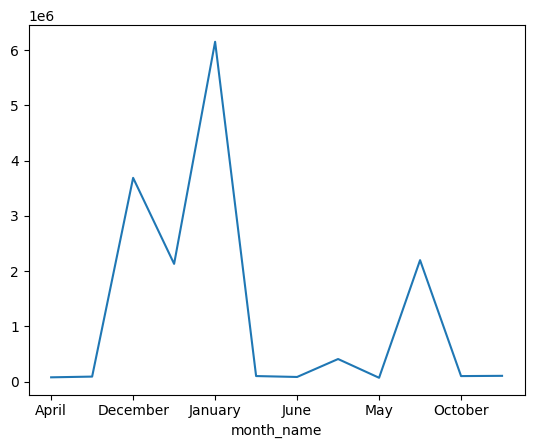

In [ ]:
ol_pr.groupby("month_name")["discouts"].count().plot.line()

# creating categories:

In [ ]:
products_clean["sku"].count()

21106

In [ ]:
products_clean["type"].nunique()

126

In [ ]:
products_clean.groupby("type")["sku"].count().sort_values(ascending=False).nlargest(30).sum()

17610

In [1]:
type_list=products_clean.groupby("type")["sku"].count().sort_values(ascending=False).nlargest(30)

NameError: ignored

In [ ]:
type_list=type_list.reset_index()

In [ ]:
type_list.info()

<class 'pandas.core.series.Series'>
Index: 30 entries, 1416 to 1325
Series name: sku
Non-Null Count  Dtype
--------------  -----
30 non-null     int64
dtypes: int64(1)
memory usage: 480.0+ bytes


In [ ]:
type_30=type_list["type"]

In [ ]:
type_30[9]

'1,44E+11'

In [ ]:
#if we create 30 categories from type it will be 83,5% from all the products.

In [ ]:
products_clean["sub_categories"]=""

In [ ]:
products_clean[products_clean["type"]=="1,44E+11"]

,sku,name,desc,type,short,price,sub_categories
275,REP0043,Speaker lower repair iPhone 4,Repair service including parts and labor for i...,"1,44E+11",REP,499.00,
282,REP0036,Full screen repair iPhone 4,Repair service including parts and labor for i...,"1,44E+11",REP,49.99,
283,REP0040,Home button repair iPhone 4,Repair service including parts and labor for i...,"1,44E+11",REP,49.99,
284,REP0041,battery repair iPhone 4,Repair service including parts and labor for i...,"1,44E+11",REP,39.99,
285,REP0041,battery repair iPhone 4,Repair service including parts and labor for i...,"1,44E+11",REP,39.99,
286,REP0041,battery repair iPhone 4,Repair service including parts and labor for i...,"1,44E+11",REP,39.99,
287,REP0041,battery repair iPhone 4,Repair service including parts and labor for i...,"1,44E+11",REP,39.99,
288,REP0045,iPhone 4 Rear Camera Repair,Installation service includes parts and labor ...,"1,44E+11",REP,49.99,
289,REP0046,iPhone 4 front camera repair,Repair service including parts and labor for i...,"1,44E+11",REP,39.99,
290,REP0050,Headset calls iPhone 4 Repair,Repair service including parts and labor for i...,"1,44E+11",REP,39.99,


In [ ]:
def types(type_num):
  type1=[]
  type1=products_clean[products_clean["type"]==str(type_num)]["desc"]
  type1= type1.str.split(' ')
  def flatten_list(t):
      #i=-1
      flat_list = []
      for sublist in t:
        for item in sublist:
            flat_list.append(item.lower())
      return flat_list
  type1=flatten_list(type1)
  df = pd.DataFrame({'col':type1})
  return df[["col"]].value_counts()


In [ ]:
types(type_30[10])

col          
mac              608
imac             584
ram              511
macbook          445
pro              420
and              380
mini             377
16gb             209
(2011)           208
5k               189
retina           182
27               179
for              177
8gb              172
memory           152
4gb              148
so-dimm          143
inch             142
1867mhz          131
(late            129
kingston         126
ddr3             126
2015).           125
(2x8gb)          121
1.35v            120
hyperx           117
(2012).          102
(2013)            99
(2011).           85
/                 76
(2010/2011)       74
135v              66
(2x4gb)           65
15v               61
32gb              49
2gb               40
(2008/10).        39
inches            38
(4x8gb)           33
(2012/2013)       30
(2014).           29
(2009/10).        28
(2011/12)         27
(2x2gb)           22
(2006/07/08).     22
(2006/07)         22
pro.              18

In [ ]:
products_clean.loc[products_clean["type"]==type_30[0],["sub_categories"]]="software"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[1],["sub_categories"]]="hard_disk"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[2],["sub_categories"]]="cases"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[3],["sub_categories"]]="server"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[4],["sub_categories"]]="iphones"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[5],["sub_categories"]]="monitor"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[6],["sub_categories"]]="open_products"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[7],["sub_categories"]]="apple_accessories"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[8],["sub_categories"]]="iphones"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[9],["sub_categories"]]="repair_service_and_parts"

In [ ]:
products_clean.loc[products_clean["type"]==type_30[10],["sub_categories"]]="macbooks"